<center> <h1> Testing the utils for the project</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/

In [1]:
import utils.EdwinRueda_utils as erutils
import tensorflow as tf
import pandas as pd

In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv",
                  index_col=0)
r_g = open("../data/reference_genes.txt").read().splitlines()
r_g.remove("idnT")
X_train = data.loc[r_g]
X_train.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964


#### Data scaling with the utils

In [3]:
scaler = erutils.scaler(xmin=-1, xmax=1)
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train_scaler.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377


#### Creating the Discriminator and Generator networks

In [10]:
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential 

noise_input = 50 #size of the noise vector
## Generator Network
G = Sequential()
G.add(Dense(noise_input, input_shape=(noise_input,)))
G.add(Dense(32))
G.add(Dropout(.1))
G.add(Dense(64))
G.add(Dropout(.15))
G.add(Dense(32))
G.add(Dense(9, activation="tanh"))

## Discriminator Network
D = Sequential()
D.add(Dense(9, input_shape=(9,)))
D.add(Dense(32))
D.add(LeakyReLU(alpha=.2))
D.add(Dropout(.1))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

In [11]:
noise_vector = tf.random_normal_initializer(0.,1.)([1, noise_input])
print("shape of the noise vector:",noise_vector.shape)
print("---------------------------------------")
synthetic_gene = G(noise_vector)
print("synthetic gene:", synthetic_gene.numpy())
print("---------------------------------------")
print("Probability of the D network:", D(synthetic_gene).numpy())
print("---------------------------------------")
print("loss:", erutils.gan_utils().binary_cross_entropy(D(synthetic_gene).numpy(), 0.).numpy())

shape of the noise vector: (1, 50)
---------------------------------------
synthetic gene: [[ 0.31468081 -0.91073194 -0.39361052  0.16017721  0.53628264  0.22100319
   0.92896348  0.98676347  0.73210851]]
---------------------------------------
Probability of the D network: [[0.3646118]]
---------------------------------------
loss: 0.45351912294046837


#### Training the GAN network

In [12]:
batch_size = 20
epochs = 1700
optimizerG = tf.optimizers.SGD(lr=0.00015, momentum=0.92, decay=0.00015/epochs)
optimizerD = tf.optimizers.SGD(lr=0.0011, momentum=0.9, decay=0.0011/epochs)

gan_utilities = erutils.gan_utils()
gloss, dloss = gan_utilities.train(X_train_scaler, G, D, noise_input, epochs, batch_size, optimizerG, optimizerD)

epochs[0:1700] :: G_loss[0.760705] :: D_loss[0.810396] :: time:0.781494[s]
epochs[1:1700] :: G_loss[0.748012] :: D_loss[0.831818] :: time:0.011068[s]
epochs[2:1700] :: G_loss[0.781633] :: D_loss[0.813923] :: time:0.010720[s]
epochs[3:1700] :: G_loss[0.764041] :: D_loss[0.820516] :: time:0.010738[s]
epochs[4:1700] :: G_loss[0.732069] :: D_loss[0.832294] :: time:0.010786[s]
epochs[5:1700] :: G_loss[0.822436] :: D_loss[0.808022] :: time:0.010611[s]
epochs[6:1700] :: G_loss[0.855579] :: D_loss[0.782793] :: time:0.010723[s]
epochs[7:1700] :: G_loss[0.741267] :: D_loss[0.816972] :: time:0.010676[s]
epochs[8:1700] :: G_loss[0.817509] :: D_loss[0.797594] :: time:0.010632[s]
epochs[9:1700] :: G_loss[0.714095] :: D_loss[0.817147] :: time:0.010668[s]
epochs[10:1700] :: G_loss[0.773786] :: D_loss[0.814970] :: time:0.010721[s]
epochs[11:1700] :: G_loss[0.774656] :: D_loss[0.794698] :: time:0.010813[s]
epochs[12:1700] :: G_loss[0.751725] :: D_loss[0.784807] :: time:0.010742[s]
epochs[13:1700] :: G_l

epochs[109:1700] :: G_loss[0.725108] :: D_loss[0.675147] :: time:0.012655[s]
epochs[110:1700] :: G_loss[0.739871] :: D_loss[0.657340] :: time:0.017592[s]
epochs[111:1700] :: G_loss[0.739670] :: D_loss[0.662009] :: time:0.014670[s]
epochs[112:1700] :: G_loss[0.632744] :: D_loss[0.706165] :: time:0.011704[s]
epochs[113:1700] :: G_loss[0.785038] :: D_loss[0.647132] :: time:0.011470[s]
epochs[114:1700] :: G_loss[0.739746] :: D_loss[0.657316] :: time:0.011252[s]
epochs[115:1700] :: G_loss[0.687656] :: D_loss[0.678771] :: time:0.010825[s]
epochs[116:1700] :: G_loss[0.710163] :: D_loss[0.671151] :: time:0.010882[s]
epochs[117:1700] :: G_loss[0.745502] :: D_loss[0.662856] :: time:0.010718[s]
epochs[118:1700] :: G_loss[0.717247] :: D_loss[0.664336] :: time:0.010752[s]
epochs[119:1700] :: G_loss[0.751094] :: D_loss[0.649154] :: time:0.010809[s]
epochs[120:1700] :: G_loss[0.781115] :: D_loss[0.633299] :: time:0.010869[s]
epochs[121:1700] :: G_loss[0.721789] :: D_loss[0.665456] :: time:0.010947[s]

epochs[221:1700] :: G_loss[0.754216] :: D_loss[0.626075] :: time:0.012329[s]
epochs[222:1700] :: G_loss[0.752186] :: D_loss[0.627511] :: time:0.012307[s]
epochs[223:1700] :: G_loss[0.807569] :: D_loss[0.604548] :: time:0.011135[s]
epochs[224:1700] :: G_loss[0.769862] :: D_loss[0.623458] :: time:0.010740[s]
epochs[225:1700] :: G_loss[0.833127] :: D_loss[0.584613] :: time:0.010849[s]
epochs[226:1700] :: G_loss[0.911050] :: D_loss[0.562931] :: time:0.010876[s]
epochs[227:1700] :: G_loss[0.789896] :: D_loss[0.608688] :: time:0.010768[s]
epochs[228:1700] :: G_loss[0.791694] :: D_loss[0.608508] :: time:0.010862[s]
epochs[229:1700] :: G_loss[0.761406] :: D_loss[0.624250] :: time:0.010848[s]
epochs[230:1700] :: G_loss[0.796786] :: D_loss[0.608611] :: time:0.010792[s]
epochs[231:1700] :: G_loss[0.763083] :: D_loss[0.627408] :: time:0.011050[s]
epochs[232:1700] :: G_loss[0.832155] :: D_loss[0.587951] :: time:0.010830[s]
epochs[233:1700] :: G_loss[0.816825] :: D_loss[0.598879] :: time:0.010720[s]

epochs[335:1700] :: G_loss[0.817233] :: D_loss[0.569974] :: time:0.013932[s]
epochs[336:1700] :: G_loss[0.843407] :: D_loss[0.573404] :: time:0.011623[s]
epochs[337:1700] :: G_loss[0.881966] :: D_loss[0.566097] :: time:0.011069[s]
epochs[338:1700] :: G_loss[0.787164] :: D_loss[0.600311] :: time:0.010710[s]
epochs[339:1700] :: G_loss[0.851802] :: D_loss[0.565120] :: time:0.010812[s]
epochs[340:1700] :: G_loss[0.857284] :: D_loss[0.552044] :: time:0.010841[s]
epochs[341:1700] :: G_loss[0.902083] :: D_loss[0.559438] :: time:0.010771[s]
epochs[342:1700] :: G_loss[0.867106] :: D_loss[0.561218] :: time:0.010824[s]
epochs[343:1700] :: G_loss[0.843971] :: D_loss[0.562615] :: time:0.010908[s]
epochs[344:1700] :: G_loss[0.910821] :: D_loss[0.539966] :: time:0.010797[s]
epochs[345:1700] :: G_loss[0.780218] :: D_loss[0.586596] :: time:0.010827[s]
epochs[346:1700] :: G_loss[0.781851] :: D_loss[0.597313] :: time:0.010863[s]
epochs[347:1700] :: G_loss[0.865164] :: D_loss[0.564698] :: time:0.010876[s]

epochs[449:1700] :: G_loss[0.804319] :: D_loss[0.571895] :: time:0.013239[s]
epochs[450:1700] :: G_loss[0.823620] :: D_loss[0.573096] :: time:0.011377[s]
epochs[451:1700] :: G_loss[0.970992] :: D_loss[0.525576] :: time:0.011003[s]
epochs[452:1700] :: G_loss[1.030854] :: D_loss[0.522531] :: time:0.010964[s]
epochs[453:1700] :: G_loss[0.937540] :: D_loss[0.536031] :: time:0.010991[s]
epochs[454:1700] :: G_loss[0.996552] :: D_loss[0.508849] :: time:0.011045[s]
epochs[455:1700] :: G_loss[0.793103] :: D_loss[0.587797] :: time:0.011009[s]
epochs[456:1700] :: G_loss[0.907403] :: D_loss[0.538457] :: time:0.010854[s]
epochs[457:1700] :: G_loss[0.936242] :: D_loss[0.517425] :: time:0.010963[s]
epochs[458:1700] :: G_loss[0.818885] :: D_loss[0.573849] :: time:0.010719[s]
epochs[459:1700] :: G_loss[0.986327] :: D_loss[0.533831] :: time:0.010734[s]
epochs[460:1700] :: G_loss[0.861545] :: D_loss[0.561676] :: time:0.013344[s]
epochs[461:1700] :: G_loss[0.946793] :: D_loss[0.522781] :: time:0.010925[s]

epochs[562:1700] :: G_loss[0.851914] :: D_loss[0.555217] :: time:0.011330[s]
epochs[563:1700] :: G_loss[0.895865] :: D_loss[0.577880] :: time:0.014714[s]
epochs[564:1700] :: G_loss[0.943240] :: D_loss[0.545850] :: time:0.010984[s]
epochs[565:1700] :: G_loss[0.761764] :: D_loss[0.639070] :: time:0.011101[s]
epochs[566:1700] :: G_loss[1.006054] :: D_loss[0.531629] :: time:0.011090[s]
epochs[567:1700] :: G_loss[0.916037] :: D_loss[0.558277] :: time:0.010901[s]
epochs[568:1700] :: G_loss[0.916791] :: D_loss[0.527626] :: time:0.010752[s]
epochs[569:1700] :: G_loss[0.933558] :: D_loss[0.539494] :: time:0.010852[s]
epochs[570:1700] :: G_loss[0.814199] :: D_loss[0.601469] :: time:0.010856[s]
epochs[571:1700] :: G_loss[1.076560] :: D_loss[0.491472] :: time:0.010816[s]
epochs[572:1700] :: G_loss[0.851995] :: D_loss[0.597928] :: time:0.010870[s]
epochs[573:1700] :: G_loss[0.952907] :: D_loss[0.534558] :: time:0.010786[s]
epochs[574:1700] :: G_loss[1.008070] :: D_loss[0.503731] :: time:0.010789[s]

epochs[672:1700] :: G_loss[0.969402] :: D_loss[0.534160] :: time:0.011177[s]
epochs[673:1700] :: G_loss[0.899402] :: D_loss[0.611994] :: time:0.012882[s]
epochs[674:1700] :: G_loss[1.004019] :: D_loss[0.595724] :: time:0.010762[s]
epochs[675:1700] :: G_loss[0.903662] :: D_loss[0.580162] :: time:0.011334[s]
epochs[676:1700] :: G_loss[0.960534] :: D_loss[0.551320] :: time:0.011193[s]
epochs[677:1700] :: G_loss[0.970482] :: D_loss[0.520169] :: time:0.010834[s]
epochs[678:1700] :: G_loss[0.763266] :: D_loss[0.638771] :: time:0.010923[s]
epochs[679:1700] :: G_loss[0.699430] :: D_loss[0.690791] :: time:0.010657[s]
epochs[680:1700] :: G_loss[0.893535] :: D_loss[0.607434] :: time:0.010714[s]
epochs[681:1700] :: G_loss[0.931688] :: D_loss[0.550435] :: time:0.010791[s]
epochs[682:1700] :: G_loss[0.916701] :: D_loss[0.591724] :: time:0.010860[s]
epochs[683:1700] :: G_loss[0.959505] :: D_loss[0.578383] :: time:0.010750[s]
epochs[684:1700] :: G_loss[0.869559] :: D_loss[0.598212] :: time:0.010900[s]

epochs[786:1700] :: G_loss[0.697646] :: D_loss[0.695564] :: time:0.012446[s]
epochs[787:1700] :: G_loss[1.008198] :: D_loss[0.579817] :: time:0.011947[s]
epochs[788:1700] :: G_loss[1.019415] :: D_loss[0.557029] :: time:0.011163[s]
epochs[789:1700] :: G_loss[0.840614] :: D_loss[0.624905] :: time:0.010814[s]
epochs[790:1700] :: G_loss[0.870500] :: D_loss[0.634040] :: time:0.010833[s]
epochs[791:1700] :: G_loss[0.876857] :: D_loss[0.592201] :: time:0.010730[s]
epochs[792:1700] :: G_loss[0.900519] :: D_loss[0.632456] :: time:0.010936[s]
epochs[793:1700] :: G_loss[0.851201] :: D_loss[0.636570] :: time:0.010801[s]
epochs[794:1700] :: G_loss[0.924305] :: D_loss[0.603505] :: time:0.010746[s]
epochs[795:1700] :: G_loss[0.829920] :: D_loss[0.686040] :: time:0.010848[s]
epochs[796:1700] :: G_loss[0.905201] :: D_loss[0.613987] :: time:0.010791[s]
epochs[797:1700] :: G_loss[0.805219] :: D_loss[0.654595] :: time:0.010957[s]
epochs[798:1700] :: G_loss[0.950847] :: D_loss[0.630614] :: time:0.010809[s]

epochs[900:1700] :: G_loss[0.881718] :: D_loss[0.668061] :: time:0.014480[s]
epochs[901:1700] :: G_loss[0.810204] :: D_loss[0.677320] :: time:0.011313[s]
epochs[902:1700] :: G_loss[0.714920] :: D_loss[0.739505] :: time:0.011309[s]
epochs[903:1700] :: G_loss[0.872628] :: D_loss[0.640328] :: time:0.011018[s]
epochs[904:1700] :: G_loss[0.758398] :: D_loss[0.712764] :: time:0.010972[s]
epochs[905:1700] :: G_loss[0.768122] :: D_loss[0.681748] :: time:0.014371[s]
epochs[906:1700] :: G_loss[0.923677] :: D_loss[0.604238] :: time:0.011021[s]
epochs[907:1700] :: G_loss[0.831081] :: D_loss[0.658536] :: time:0.010936[s]
epochs[908:1700] :: G_loss[0.708932] :: D_loss[0.762294] :: time:0.010928[s]
epochs[909:1700] :: G_loss[0.944702] :: D_loss[0.623011] :: time:0.011210[s]
epochs[910:1700] :: G_loss[0.818280] :: D_loss[0.679497] :: time:0.011085[s]
epochs[911:1700] :: G_loss[0.862653] :: D_loss[0.650042] :: time:0.010881[s]
epochs[912:1700] :: G_loss[0.821630] :: D_loss[0.659135] :: time:0.010907[s]

epochs[1010:1700] :: G_loss[0.826553] :: D_loss[0.686107] :: time:0.011830[s]
epochs[1011:1700] :: G_loss[0.789404] :: D_loss[0.683740] :: time:0.013962[s]
epochs[1012:1700] :: G_loss[0.659910] :: D_loss[0.755553] :: time:0.011011[s]
epochs[1013:1700] :: G_loss[0.773217] :: D_loss[0.718588] :: time:0.011529[s]
epochs[1014:1700] :: G_loss[0.877500] :: D_loss[0.642709] :: time:0.010981[s]
epochs[1015:1700] :: G_loss[0.738789] :: D_loss[0.712956] :: time:0.010831[s]
epochs[1016:1700] :: G_loss[0.778237] :: D_loss[0.690313] :: time:0.010849[s]
epochs[1017:1700] :: G_loss[0.770220] :: D_loss[0.705317] :: time:0.010788[s]
epochs[1018:1700] :: G_loss[0.808162] :: D_loss[0.683491] :: time:0.010965[s]
epochs[1019:1700] :: G_loss[0.683658] :: D_loss[0.735694] :: time:0.010729[s]
epochs[1020:1700] :: G_loss[0.832060] :: D_loss[0.665155] :: time:0.010907[s]
epochs[1021:1700] :: G_loss[0.801264] :: D_loss[0.695222] :: time:0.010966[s]
epochs[1022:1700] :: G_loss[0.795239] :: D_loss[0.682696] :: tim

epochs[1122:1700] :: G_loss[0.792209] :: D_loss[0.675864] :: time:0.013020[s]
epochs[1123:1700] :: G_loss[0.773211] :: D_loss[0.690972] :: time:0.011733[s]
epochs[1124:1700] :: G_loss[0.849397] :: D_loss[0.671147] :: time:0.011376[s]
epochs[1125:1700] :: G_loss[0.709634] :: D_loss[0.705854] :: time:0.010953[s]
epochs[1126:1700] :: G_loss[0.707311] :: D_loss[0.707577] :: time:0.011066[s]
epochs[1127:1700] :: G_loss[0.759193] :: D_loss[0.680995] :: time:0.010860[s]
epochs[1128:1700] :: G_loss[0.870993] :: D_loss[0.668150] :: time:0.010966[s]
epochs[1129:1700] :: G_loss[0.792121] :: D_loss[0.683449] :: time:0.010815[s]
epochs[1130:1700] :: G_loss[0.709302] :: D_loss[0.705904] :: time:0.010819[s]
epochs[1131:1700] :: G_loss[0.868771] :: D_loss[0.656296] :: time:0.010947[s]
epochs[1132:1700] :: G_loss[0.845875] :: D_loss[0.664467] :: time:0.011622[s]
epochs[1133:1700] :: G_loss[0.778024] :: D_loss[0.667085] :: time:0.010782[s]
epochs[1134:1700] :: G_loss[0.753009] :: D_loss[0.694833] :: tim

epochs[1236:1700] :: G_loss[0.771756] :: D_loss[0.690377] :: time:0.016490[s]
epochs[1237:1700] :: G_loss[0.782997] :: D_loss[0.667994] :: time:0.011431[s]
epochs[1238:1700] :: G_loss[0.846119] :: D_loss[0.660043] :: time:0.011235[s]
epochs[1239:1700] :: G_loss[0.845621] :: D_loss[0.658289] :: time:0.011032[s]
epochs[1240:1700] :: G_loss[0.834517] :: D_loss[0.655000] :: time:0.010818[s]
epochs[1241:1700] :: G_loss[0.789000] :: D_loss[0.684986] :: time:0.010983[s]
epochs[1242:1700] :: G_loss[0.808399] :: D_loss[0.651878] :: time:0.011047[s]
epochs[1243:1700] :: G_loss[0.834021] :: D_loss[0.669946] :: time:0.010848[s]
epochs[1244:1700] :: G_loss[0.771607] :: D_loss[0.664018] :: time:0.010877[s]
epochs[1245:1700] :: G_loss[0.795687] :: D_loss[0.669601] :: time:0.010839[s]
epochs[1246:1700] :: G_loss[0.823578] :: D_loss[0.664163] :: time:0.010792[s]
epochs[1247:1700] :: G_loss[0.752353] :: D_loss[0.686797] :: time:0.010974[s]
epochs[1248:1700] :: G_loss[0.749521] :: D_loss[0.705528] :: tim

epochs[1344:1700] :: G_loss[0.781754] :: D_loss[0.648266] :: time:0.012396[s]
epochs[1345:1700] :: G_loss[0.725288] :: D_loss[0.692940] :: time:0.014361[s]
epochs[1346:1700] :: G_loss[0.759613] :: D_loss[0.680035] :: time:0.011460[s]
epochs[1347:1700] :: G_loss[0.713514] :: D_loss[0.689326] :: time:0.011525[s]
epochs[1348:1700] :: G_loss[0.835087] :: D_loss[0.654496] :: time:0.013550[s]
epochs[1349:1700] :: G_loss[0.817128] :: D_loss[0.658499] :: time:0.011030[s]
epochs[1350:1700] :: G_loss[0.745038] :: D_loss[0.680084] :: time:0.010760[s]
epochs[1351:1700] :: G_loss[0.753762] :: D_loss[0.687341] :: time:0.010846[s]
epochs[1352:1700] :: G_loss[0.772396] :: D_loss[0.673771] :: time:0.010931[s]
epochs[1353:1700] :: G_loss[0.802560] :: D_loss[0.666947] :: time:0.010804[s]
epochs[1354:1700] :: G_loss[0.767532] :: D_loss[0.671064] :: time:0.010808[s]
epochs[1355:1700] :: G_loss[0.774155] :: D_loss[0.660273] :: time:0.010906[s]
epochs[1356:1700] :: G_loss[0.780975] :: D_loss[0.689197] :: tim

epochs[1457:1700] :: G_loss[0.757518] :: D_loss[0.696839] :: time:0.013255[s]
epochs[1458:1700] :: G_loss[0.697768] :: D_loss[0.688835] :: time:0.011841[s]
epochs[1459:1700] :: G_loss[0.747000] :: D_loss[0.686549] :: time:0.011125[s]
epochs[1460:1700] :: G_loss[0.757206] :: D_loss[0.666831] :: time:0.010891[s]
epochs[1461:1700] :: G_loss[0.690579] :: D_loss[0.714120] :: time:0.010843[s]
epochs[1462:1700] :: G_loss[0.748401] :: D_loss[0.671962] :: time:0.011009[s]
epochs[1463:1700] :: G_loss[0.828193] :: D_loss[0.645546] :: time:0.011079[s]
epochs[1464:1700] :: G_loss[0.733395] :: D_loss[0.694861] :: time:0.010874[s]
epochs[1465:1700] :: G_loss[0.792391] :: D_loss[0.660401] :: time:0.010877[s]
epochs[1466:1700] :: G_loss[0.753592] :: D_loss[0.687792] :: time:0.010838[s]
epochs[1467:1700] :: G_loss[0.697309] :: D_loss[0.691032] :: time:0.010732[s]
epochs[1468:1700] :: G_loss[0.748058] :: D_loss[0.674698] :: time:0.011012[s]
epochs[1469:1700] :: G_loss[0.766094] :: D_loss[0.666782] :: tim

epochs[1571:1700] :: G_loss[0.709763] :: D_loss[0.682707] :: time:0.012752[s]
epochs[1572:1700] :: G_loss[0.718651] :: D_loss[0.698806] :: time:0.011307[s]
epochs[1573:1700] :: G_loss[0.772008] :: D_loss[0.663165] :: time:0.011210[s]
epochs[1574:1700] :: G_loss[0.705671] :: D_loss[0.693436] :: time:0.010875[s]
epochs[1575:1700] :: G_loss[0.692849] :: D_loss[0.706392] :: time:0.010791[s]
epochs[1576:1700] :: G_loss[0.799238] :: D_loss[0.653936] :: time:0.011007[s]
epochs[1577:1700] :: G_loss[0.791302] :: D_loss[0.655707] :: time:0.010921[s]
epochs[1578:1700] :: G_loss[0.742378] :: D_loss[0.679879] :: time:0.010840[s]
epochs[1579:1700] :: G_loss[0.725355] :: D_loss[0.693749] :: time:0.011086[s]
epochs[1580:1700] :: G_loss[0.735023] :: D_loss[0.686264] :: time:0.010917[s]
epochs[1581:1700] :: G_loss[0.675128] :: D_loss[0.703393] :: time:0.010812[s]
epochs[1582:1700] :: G_loss[0.731137] :: D_loss[0.680540] :: time:0.010826[s]
epochs[1583:1700] :: G_loss[0.762354] :: D_loss[0.671466] :: tim

epochs[1680:1700] :: G_loss[0.739962] :: D_loss[0.687395] :: time:0.011258[s]
epochs[1681:1700] :: G_loss[0.723528] :: D_loss[0.697421] :: time:0.014180[s]
epochs[1682:1700] :: G_loss[0.707422] :: D_loss[0.698542] :: time:0.010804[s]
epochs[1683:1700] :: G_loss[0.783719] :: D_loss[0.674528] :: time:0.011250[s]
epochs[1684:1700] :: G_loss[0.720362] :: D_loss[0.690712] :: time:0.010919[s]
epochs[1685:1700] :: G_loss[0.754549] :: D_loss[0.685476] :: time:0.010962[s]
epochs[1686:1700] :: G_loss[0.752273] :: D_loss[0.669731] :: time:0.010917[s]
epochs[1687:1700] :: G_loss[0.707831] :: D_loss[0.699266] :: time:0.010902[s]
epochs[1688:1700] :: G_loss[0.723250] :: D_loss[0.688569] :: time:0.010941[s]
epochs[1689:1700] :: G_loss[0.717237] :: D_loss[0.697291] :: time:0.011017[s]
epochs[1690:1700] :: G_loss[0.760791] :: D_loss[0.667372] :: time:0.010867[s]
epochs[1691:1700] :: G_loss[0.720994] :: D_loss[0.687222] :: time:0.010782[s]
epochs[1692:1700] :: G_loss[0.701590] :: D_loss[0.694804] :: tim

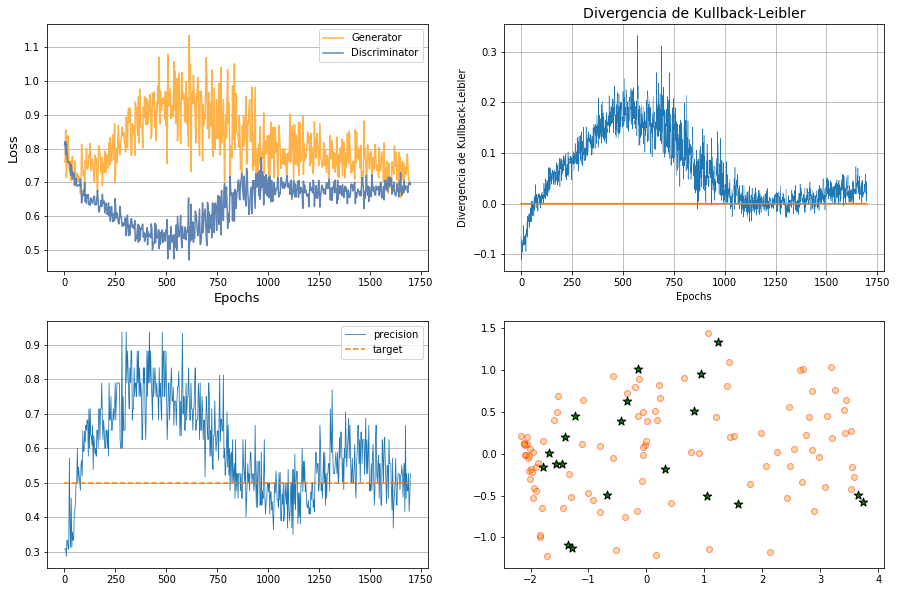

In [13]:
p = gan_utilities.plot_results(100)